## Import Modules and required Libraries

In [1]:
# Core libraries
import scipy as sp
import numpy as np
import matplotlib as mpl
import pandas as pd

# Algorithm libraries & modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
# Define input file
input_file = 'google_reviews.csv'

In [7]:
# Define a function to create our datframe
def get_df(file):
    ds = pd.read_csv(file)
    df = pd.DataFrame(ds)
    df = df.fillna(0)
    return df

# Call the function
df = get_df(input_file)
#read csv
dataset = pd.read_csv("google_reviews.csv")

In [11]:
# Define a function to explore the data
def plot_properties (dataframe):
    print(f'Question 5: the custering will be based on {dataframe.shape[0]} cases\n')
    print(f'Question 6: the custering will be based on {dataframe.shape[1]} dimensions\n')
    print("""Question 7: the data points represented as the following: Each row represents a series of 24 reviews
    Every review over the rating 3 - is being valued with 1 , and 0 otherwise.\n
    """)
    print(dataset.iloc[5000,:])

# Call the function
plot_properties(df)

Question 5: the custering will be based on 5454 cases

Question 6: the custering will be based on 24 dimensions

Question 7: the data points represented as the following: Each row represents a series of 24 reviews
    Every review over the rating 3 - is being valued with 1 , and 0 otherwise.

    
Churches                0
Resorts                 0
Beaches                 0
Parks                   1
Theaters                1
Museums                 1
Malls                   1
Zoo                     0
Restaurants             0
Pubs/Bars               0
Local Services          0
Burger/Pizza Shops      0
Hotel/Other Lodgings    0
Juice Bars              0
Art Galleries           0
Dance Clubs             0
Swimming Pools          0
Gyms                    0
Bakeries                0
Beauty & Spas           0
Cafes                   0
View Points             0
Monuments               0
Gardens                 0
Name: 5000, dtype: int64


### K-means model

In [20]:
# Define distance function, number of clusters, and range of K's
distance_metric = 'euclidean'
max_k = 5
k_range = np.arange(2, max_k+1, 1)


# Define a function that will locate centroids and fit data points
def get_clusterer (points, k):
    clusterer = KMeans (n_clusters = k)
    preds = clusterer.fit_predict(points)
    return clusterer, preds

# Call the function
clusterer, preds = get_clusterer(df, max_k)

def get_best_k():
    
    # Define a function that will calculate the silouhettes of different models
    def get_silhouettes (df, preds):
        Silhouettes = []
        for K in k_range:
            clusterer, preds = get_clusterer (df, K)
            Silhouettes.append(silhouette_score(df, preds, metric = distance_metric))
        return Silhouettes

    # Call the function 
    Silhouettes = get_silhouettes (df, preds)
    #Determine the best K value - by the Silhouette measure
    max_k = -1
    best_k = 5
    for count, value in enumerate(Silhouettes):
        if(value>max_k):
            best_k = count+1
    return best_k

best_k = get_best_k()
print(f'Question 8: based on Silhouette measure , the optimal K is: {best_k}')
    



Question 8: based on Silhouette measure , the optimal K is: 4


### Cluster Allocation of datapoints


labels: [0 0 0 ... 2 2 2] 

centroids:
0 : [8.80503145e-03 2.25786164e-01 4.08805031e-01 7.66037736e-01
 9.69811321e-01 7.10691824e-01 5.81132075e-01 7.98742138e-02
 1.66666667e-01 1.55345912e-01 1.89937107e-01 1.91823899e-01
 1.44025157e-01 4.46540881e-02 7.23270440e-02 5.59748428e-02
 1.25786164e-02 6.28930818e-04 1.06918239e-02 1.88679245e-02
 3.20754717e-02 3.01886792e-01 2.06918239e-01 1.25786164e-01] 

1 : [0.00856793 0.18543452 0.09424725 0.11138311 0.22827417 0.53488372
 0.91860465 0.85862913 0.96878825 0.7753978  0.48470012 0.08078335
 0.11872705 0.17319461 0.29559364 0.04039168 0.00734394 0.00367197
 0.00489596 0.02203182 0.00367197 0.09241126 0.04406365 0.01162791] 

2 : [0.11111111 0.27964206 0.25577927 0.16778523 0.02609993 0.01416853
 0.09246831 0.01416853 0.13348248 0.05070843 0.01640567 0.00745712
 0.01715138 0.07755406 0.29530201 0.15585384 0.14765101 0.12751678
 0.23266219 0.21998509 0.14690529 0.35645041 0.22744221 0.20432513] 

3 : [0.02474691 0.13273341 0.0416198  

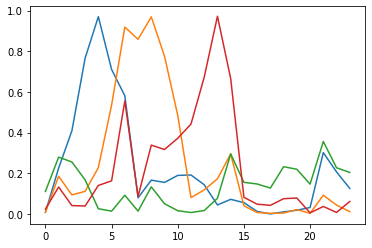

In [27]:
#Cluster accordign to the new K found
clusterer, preds = get_clusterer(df, best_k)

#get data points assignment
labels = clusterer.labels_

        
# Call the function
show_results(clusterer)
print(f'Question 9: Data point 1: {labels[0]}\nData point 2:{labels[1]}\nlast Data point: {labels[-1]}\nBefore last data point:{labels[-2]}')

labels: [0 0 0 ... 2 2 2] 

centroids:
0 : [8.80503145e-03 2.25786164e-01 4.08805031e-01 7.66037736e-01
 9.69811321e-01 7.10691824e-01 5.81132075e-01 7.98742138e-02
 1.66666667e-01 1.55345912e-01 1.89937107e-01 1.91823899e-01
 1.44025157e-01 4.46540881e-02 7.23270440e-02 5.59748428e-02
 1.25786164e-02 6.28930818e-04 1.06918239e-02 1.88679245e-02
 3.20754717e-02 3.01886792e-01 2.06918239e-01 1.25786164e-01] 

1 : [0.00856793 0.18543452 0.09424725 0.11138311 0.22827417 0.53488372
 0.91860465 0.85862913 0.96878825 0.7753978  0.48470012 0.08078335
 0.11872705 0.17319461 0.29559364 0.04039168 0.00734394 0.00367197
 0.00489596 0.02203182 0.00367197 0.09241126 0.04406365 0.01162791] 

2 : [0.11111111 0.27964206 0.25577927 0.16778523 0.02609993 0.01416853
 0.09246831 0.01416853 0.13348248 0.05070843 0.01640567 0.00745712
 0.01715138 0.07755406 0.29530201 0.15585384 0.14765101 0.12751678
 0.23266219 0.21998509 0.14690529 0.35645041 0.22744221 0.20432513] 

3 : [0.02474691 0.13273341 0.0416198  

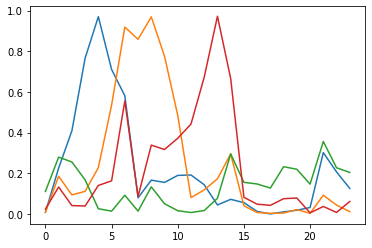

In [29]:
# Define a function that will show the model's results numerically and visually
def show_results (clusterer):
    print('labels:', clusterer.labels_, '\n')
    centers = clusterer.cluster_centers_
    print('centroids:')
    for i in range(best_k):
        print(i, ":", centers[i,:],'\n')
    for i in range(best_k):
        plt.plot(centers[i,:])
        
# Call the function
show_results(clusterer)

In [30]:
#Question 10 
print("""Question 10: As we can se from the visual plot of the allocation to clusters, 
Green Cluster - very low mean values for each category , as the heighst score is 0.4 - suggests that most of 
the data points in this cluster gave their attractions a review of 3 start and below
Blue Cluster - Attraction number 4 - the Parks has a mean value of 1 - almost all the data points (if not all) in the cluster
rated the Parks with a review higher than 3 stars.
As for attractions 15-16 , their mean value is very close to 0 , suggesting very low rating reviews from the critics 
in the cluster for the Art Galleries and Dance Clubs
Orange Cluster - very high critics reviews for attractions - Malls , Zoo and the Restraunts . 
with Restraunts , all the data points has a gave a review higher than 3 stars.
almost identical to the blue cluster , Art Galleries and Dance Clubs got low ratings from the cluster data points
Red Cluster - Juice Bars receieved high reviews from this group, 
As we can the the first attractions - Churches was fairly dissapointing with low mean value from each of the clusters
""")

Question 10: As we can se from the visual plot of the allocation to clusters, 
Green Cluster - very low mean values for each category , as the heighst score is 0.4 - suggests that most of 
the data points in this cluster gave their attractions a review of 3 start and below
Blue Cluster - Attraction number 4 - the Parks has a mean value of 1 - almost all the data points (if not all) in the cluster
rated the Parks with a review higher than 3 stars.
As for attractions 15-16 , their mean value is very close to 0 , suggesting very low rating reviews from the critics 
in the cluster for the Art Galleries and Dance Clubs
Orange Cluster - very high critics reviews for attractions - Malls , Zoo and the Restraunts . 
with Restraunts , all the data points has a gave a review higher than 3 stars.
almost identical to the blue cluster , Art Galleries and Dance Clubs got low ratings from the cluster data points
Red Cluster - Juice Bars receieved high reviews from this group, 
As we can the the first 